In [1]:
#ARIM(Significant PACF lag, diff order to get my time series stationary,Significant ACF lag)

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from datetime import datetime
from datetime import timedelta
from pandas.plotting import register_matplotlib_converters
from statsmodels.tsa.stattools import acf, pacf
from statsmodels.tsa.arima.model import ARIMA
register_matplotlib_converters()
from time import time

In [3]:
def parser(s):
    return datetime.strptime(s,'%Y-%m-%d')

In [4]:
#read data
catfish_sales=pd.read_csv('catfish.csv',parse_dates=[0],index_col=0,squeeze=True,date_parser=parser)
catfish_sales

Date
1986-01-01     9034
1986-02-01     9596
1986-03-01    10558
1986-04-01     9002
1986-05-01     9239
              ...  
2012-08-01    14442
2012-09-01    13422
2012-10-01    13795
2012-11-01    13352
2012-12-01    12716
Name: Total, Length: 324, dtype: int64

In [5]:
#infer the frequency of the data
catfish_sales=catfish_sales.asfreq(pd.infer_freq(catfish_sales.index))

In [6]:
start_date=datetime(2000,1,1)
end_date=datetime(2004,1,1)
lim_catfish_sales=catfish_sales[start_date:end_date]

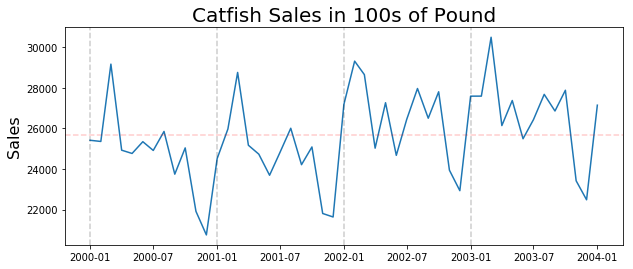

In [7]:
plt.figure(figsize=(10,4))
plt.plot(lim_catfish_sales)
plt.title('Catfish Sales in 100s of Pound',fontsize=20)
plt.ylabel('Sales',fontsize=16)
for year in range(start_date.year,end_date.year):
    plt.axvline(pd.to_datetime(str(year)+'-01-01'),color='k',linestyle='--',alpha=0.2)
plt.axhline(lim_catfish_sales.mean(),color='r',alpha=0.2,linestyle='--')

In [8]:
first_diff= lim_catfish_sales.diff()[1:]

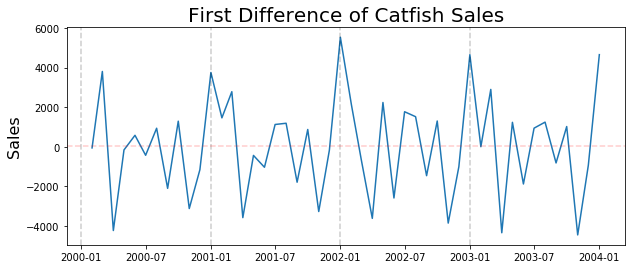

In [9]:
plt.figure(figsize=(10,4))
plt.plot(first_diff)
plt.title('First Difference of Catfish Sales', fontsize=20)
plt.ylabel('Sales', fontsize=16)
for year in range(start_date.year,end_date.year):
    plt.axvline(pd.to_datetime(str(year)+'-01-01'), color='k', linestyle='--', alpha=0.2)
plt.axhline(first_diff.mean(), color='r', alpha=0.2, linestyle='--')

<BarContainer object of 17 artists>

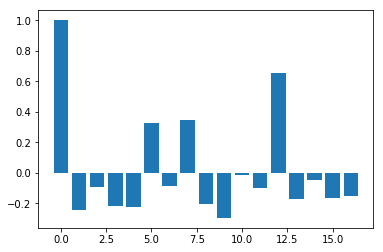

In [10]:
num_lags=17
acf_vals = acf(first_diff)
plt.bar(range(num_lags), acf_vals[:num_lags])

<BarContainer object of 17 artists>

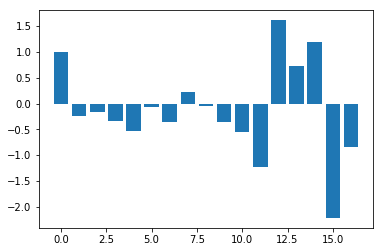

In [11]:
pacf_vals = pacf(first_diff)
plt.bar(range(num_lags), pacf_vals[:num_lags])#lag at 0 and lag at 12, indicates seasonalilty but we will discuss it in later topics 

In [12]:
#Get traininf and testing sets
train_end=datetime(2003,7,1)
test_end=datetime(2004,1,1)
train_data=first_diff[:train_end]
test_data=first_diff[train_end+timedelta(days=1):test_end]
train_data.dropna()

Date
2000-02-01     -58.0
2000-03-01    3807.0
2000-04-01   -4237.0
2000-05-01    -161.0
2000-06-01     579.0
2000-07-01    -431.0
2000-08-01     936.0
2000-09-01   -2104.0
2000-10-01    1293.0
2000-11-01   -3125.0
2000-12-01   -1159.0
2001-01-01    3755.0
2001-02-01    1461.0
2001-03-01    2784.0
2001-04-01   -3585.0
2001-05-01    -439.0
2001-06-01   -1038.0
2001-07-01    1126.0
2001-08-01    1188.0
2001-09-01   -1794.0
2001-10-01     873.0
2001-11-01   -3276.0
2001-12-01    -172.0
2002-01-01    5538.0
2002-02-01    2135.0
2002-03-01    -663.0
2002-04-01   -3622.0
2002-05-01    2238.0
2002-06-01   -2591.0
2002-07-01    1771.0
2002-08-01    1520.0
2002-09-01   -1463.0
2002-10-01    1302.0
2002-11-01   -3861.0
2002-12-01   -1009.0
2003-01-01    4654.0
2003-02-01       2.0
2003-03-01    2899.0
2003-04-01   -4350.0
2003-05-01    1235.0
2003-06-01   -1883.0
2003-07-01     940.0
Freq: MS, Name: Total, dtype: float64

In [13]:
#define model
model=ARIMA(train_data,order=(4,0,0))

In [14]:
#fit the model
start=time()
model_fit=model.fit()
end=time()
print('Model Fitting Time: ',end-start)

Model Fitting Time:  0.07907414436340332


In [15]:
#summary of the model
print(model_fit.summary())

                               SARIMAX Results                                
Dep. Variable:                  Total   No. Observations:                   42
Model:                 ARIMA(4, 0, 0)   Log Likelihood                -376.999
Date:                Tue, 09 Aug 2022   AIC                            765.998
Time:                        13:26:55   BIC                            776.424
Sample:                    02-01-2000   HQIC                           769.819
                         - 07-01-2003                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         24.1669    124.171      0.195      0.846    -219.203     267.537
ar.L1         -0.5024      0.127     -3.956      0.000      -0.751      -0.254
ar.L2         -0.3082      0.160     -1.928      0.0

In [16]:
#get prediction start and end dates
pred_start_date = test_data.index[0]
pred_end_date = test_data.index[-1]

In [17]:
#get the predictions and residuals
predictions = model_fit.predict(start=pred_start_date, end=pred_end_date)
residuals = test_data - predictions

Text(0, 0.5, 'Sales')

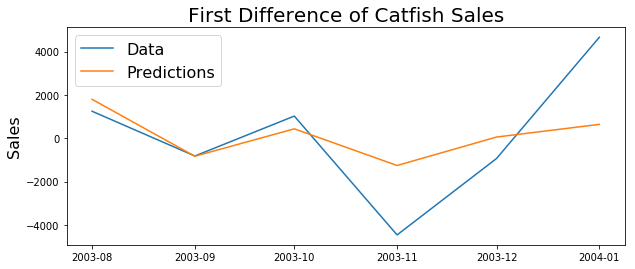

In [18]:
plt.figure(figsize=(10,4))

plt.plot(test_data)
plt.plot(predictions)

plt.legend(('Data', 'Predictions'), fontsize=16)

plt.title('First Difference of Catfish Sales', fontsize=20)
plt.ylabel('Sales', fontsize=16)

In [19]:
print('Root Mean Squared Error:', np.sqrt(np.mean(residuals**2)))

Root Mean Squared Error: 2161.2953179093515


In [20]:
predictions

2003-08-01    1795.291953
2003-09-01    -830.270948
2003-10-01     433.607633
2003-11-01   -1257.270729
2003-12-01      55.241699
2004-01-01     639.497617
Freq: MS, Name: predicted_mean, dtype: float64

In [22]:
train_data[-5:]

Date
2003-03-01    2899.0
2003-04-01   -4350.0
2003-05-01    1235.0
2003-06-01   -1883.0
2003-07-01     940.0
Freq: MS, Name: Total, dtype: float64

In [23]:
model_fit.params[0]+(model_fit.params[1]*940.0)+(model_fit.params[2]*-1883.0)+(model_fit.params[3]*1235.0)+(model_fit.params[4]*-4350.0)

1751.4605459490394

In [24]:
model_fit.params[0]+(model_fit.params[1]*1751.4605459490394)+(model_fit.params[2]* 940.0)+(model_fit.params[3]*-1883.0)+(model_fit.params[4]*1235.0)

-852.0826059052504

In [25]:
model_fit.params[0]+(model_fit.params[1]*-839.9418115528747)+(model_fit.params[2]*1751.4605459490394)+(model_fit.params[3]*940.0)+(model_fit.params[4]*-1883.0)

408.14129381167663

In [26]:
#define model
model=ARIMA(train_data,order=(4,0,4))

In [27]:
#fit the model
start=time()
model_fit=model.fit()
end=time()
print('Model Fitting Time: ',end-start)

Model Fitting Time:  0.403592586517334


C:\Users\nafissaad\AppData\Local\Programs\Python\Python37\lib\site-packages\statsmodels\base\model.py:606: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  ConvergenceWarning)


In [28]:
#summary of the model
print(model_fit.summary())

                               SARIMAX Results                                
Dep. Variable:                  Total   No. Observations:                   42
Model:                 ARIMA(4, 0, 4)   Log Likelihood                -371.261
Date:                Tue, 09 Aug 2022   AIC                            762.522
Time:                        13:27:34   BIC                            779.899
Sample:                    02-01-2000   HQIC                           768.891
                         - 07-01-2003                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         42.4151     73.879      0.574      0.566    -102.386     187.216
ar.L1         -0.8872      0.444     -1.999      0.046      -1.757      -0.018
ar.L2         -0.1146      0.686     -0.167      0.8

In [29]:
#get the predictions and residuals
predictions = model_fit.predict(start=pred_start_date, end=pred_end_date)
residuals = test_data - predictions

Text(0, 0.5, 'Sales')

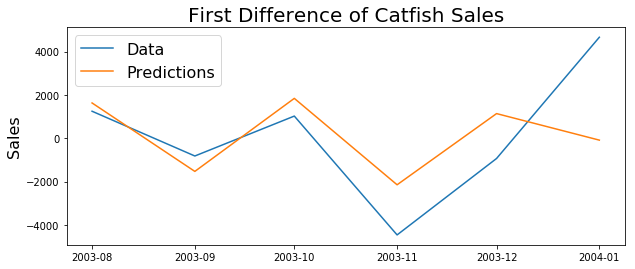

In [30]:
plt.figure(figsize=(10,4))

plt.plot(test_data)
plt.plot(predictions)

plt.legend(('Data', 'Predictions'), fontsize=16)

plt.title('First Difference of Catfish Sales', fontsize=20)
plt.ylabel('Sales', fontsize=16)

In [ ]:
print('Root Mean Squared Error:', np.sqrt(np.mean(residuals**2)))